In [1]:
# 1 importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# 2 importing dataset 

df = pd.read_csv(r"C:\Users\Windows\6 - Project\Prepared Data\cleaned_subset.csv", index_col = 0)

In [3]:
df.head()

,id,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,rating
0,1419,1565,Little Portugal,43.64590,-79.42423,Entire home/apt,120.0,28,6,2017-08-07,0.06,1,0,0,5.00
1,26654,113345,Waterfront Communities-The Island,43.64608,-79.39032,Entire home/apt,145.0,28,42,2023-09-01,0.27,5,77,2,4.79
2,27423,118124,South Riverdale,43.66884,-79.32725,Entire home/apt,75.0,90,28,2023-08-31,0.17,1,215,1,4.93
3,40456,174063,South Parkdale,43.63539,-79.44010,Entire home/apt,150.0,750,113,2023-06-19,0.69,4,364,2,4.64
4,43964,192364,Wexford/Maryvale,43.74922,-79.29188,Entire home/apt,195.0,1,67,2023-09-25,0.78,1,364,13,4.96


In [5]:
# 2 Remove categorical variables and other variables that do not contribute to this clustering analysis

df_1 = df.drop(columns=['id','host_id', 'neighbourhood', 'room_type','last_review', 'latitude', 'longitude'])

In [6]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15108 entries, 0 to 15107
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   price                           15108 non-null  float64
 1   minimum_nights                  15108 non-null  int64  
 2   number_of_reviews               15108 non-null  int64  
 3   reviews_per_month               15108 non-null  float64
 4   calculated_host_listings_count  15108 non-null  int64  
 5   availability_365                15108 non-null  int64  
 6   number_of_reviews_ltm           15108 non-null  int64  
 7   rating                          15108 non-null  float64
dtypes: float64(3), int64(5)
memory usage: 1.0 MB


In [7]:
# difference between variables' scales unlikely bias results 

In [8]:
#3 Use the elbow technique as shown in the Jupyter notebook for this Exercise

num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [10]:
score = [kmeans[i].fit(df_1).score(df_1) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-1551418642.163109,
 -871793069.1989746,
 -619978066.7533149,
 -414783099.1094144,
 -298193452.4235011,
 -246836542.01111928,
 -214205734.48757118,
 -186391444.79545826,
 -160327380.8072938]

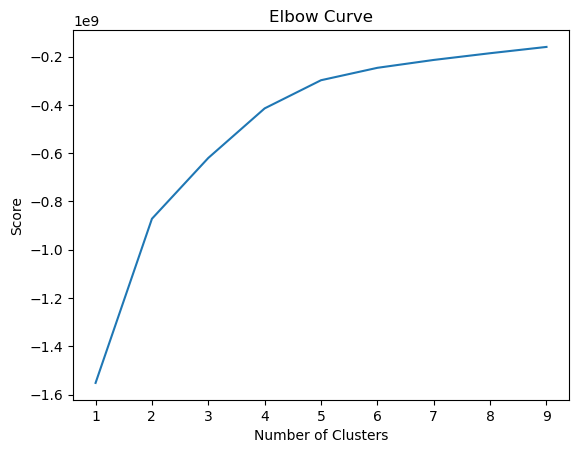

In [11]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [12]:
# 4 Make an informed decision about the number of clusters you’ll use in your k-means algorithm based on the chart



#### Based on my data, it looks like the score begins to flatten out around 4 clusters. Therefore, I will use 4 as my number of clusters.

In [19]:
# 5 Run the k-means algorithm.

# Create the k-means object.

kmeans = KMeans(n_clusters = 4) 

# Fit the k-means object to the data.

kmeans.fit(df_1)

KMeans(n_clusters=4)

In [20]:
#6 Attach a new column to your dataframe with the resulting clusters as shown in the Exercise. This will allow you to create a visualization using your clusters.
df_1['clusters'] = kmeans.fit_predict(df_1)

In [21]:
df_1.head()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,rating,clusters
0,120.0,28,6,0.06,1,0,0,5.00,0
1,145.0,28,42,0.27,5,77,2,4.79,0
2,75.0,90,28,0.17,1,215,1,4.93,2
3,150.0,750,113,0.69,4,364,2,4.64,2
4,195.0,1,67,0.78,1,364,13,4.96,2


In [23]:
df_1['clusters'].value_counts()

clusters
0    9249
2    5786
3      67
1       6
Name: count, dtype: int64

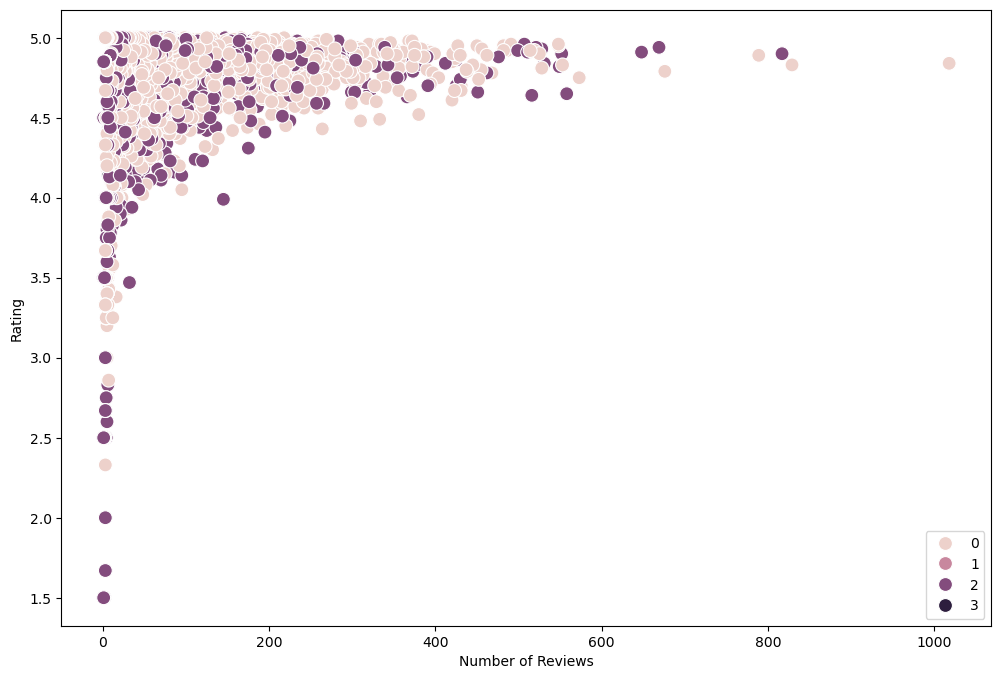

In [22]:
#7 Create a few different visualizations (e.g., scatterplots) using your clustered data. Try plotting different variables against each other to see the results in terms of the clusters.


# # Looking at the relationship minimum number of reviews and rating 


plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_1['number_of_reviews'], y=df_1['rating'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Number of Reviews') # Label x-axis.
plt.ylabel('Rating') # Label y-axis.
plt.show()


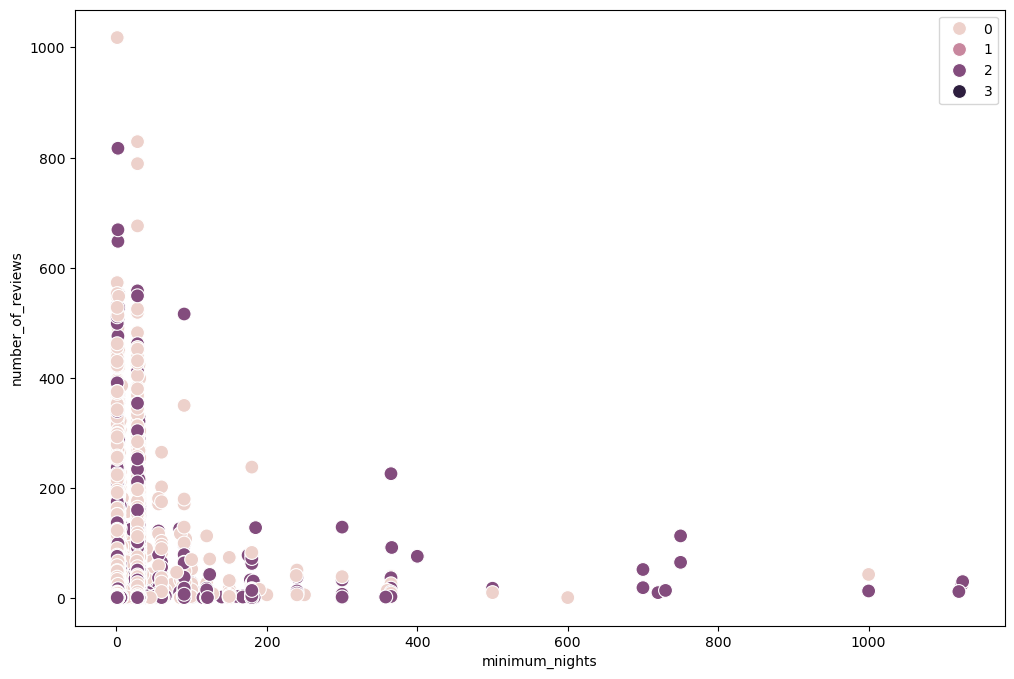

In [24]:
# Looking at the relationship minimum number of nights and number of reviews 
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_1['minimum_nights'], y=df_1['number_of_reviews'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('minimum_nights') # Label x-axis.
plt.ylabel('number_of_reviews') # Label y-axis.
plt.show()


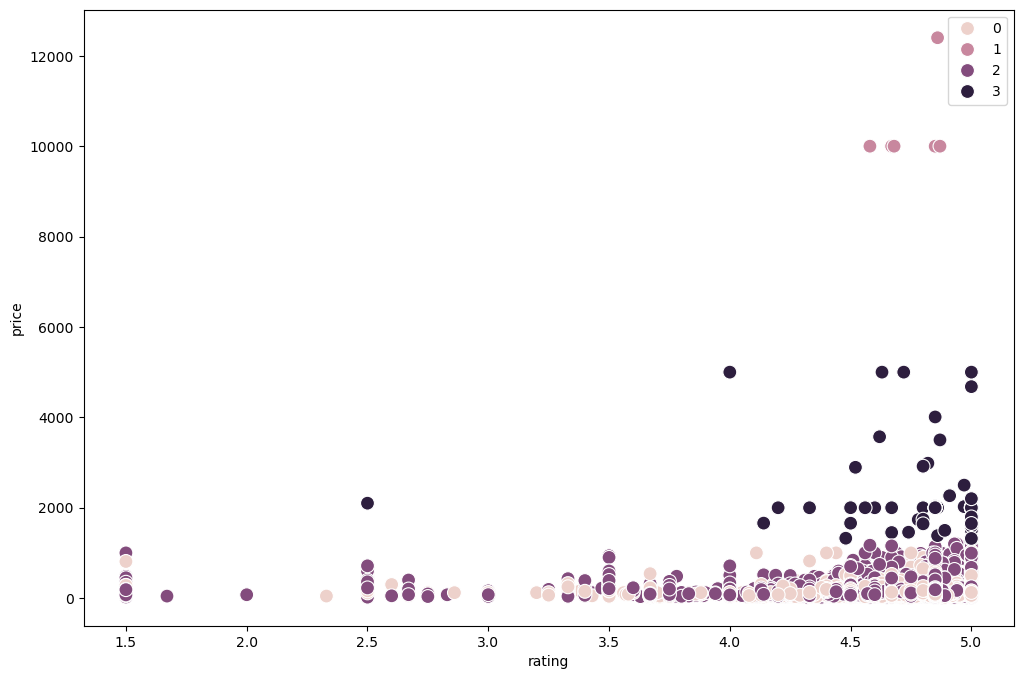

In [25]:
# Looking at the relationship between rating and price

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_1['rating'], y=df_1['price'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('rating') # Label x-axis.
plt.ylabel('price') # Label y-axis.
plt.show()

In [26]:
# 8 Discuss how and why the clusters make sense.If they don’t make sense, however, this is also useful insight, as it means you’ll need to explore the data further.


#### After analyzing the above 3 visualizations, only the last one (rating v price) reveals discernible relationships by means of clustering.  There are at least 2 main clusters. In cluster =3 (black), they are almost all between rating 4.0-5.0 with price at a higher end. This makes logical sense to me since higher ratings should command higher prices. This was not clear to me from the earlier exploratory data analysis. We see that only these points between 4.0-4.5 correspond to higher prices, but not less than 4.0. There are a few data points belonging to cluster =1, that show some extreme values between rating 4.5-5.0. However, clusters 0 and 2 seem to be interspersed with each other without showing any clear relationship for either cluster.

#### For the second visualization, we can see that the more nights one spends, there is no proportional increase in number of reviews. Therefore, cluster = 0 has most of the data points. Cluster =2 with more nights spent, has very few points, but the points seem to be on a downward trend the more nights one spends. 


#### For the first visualization, almost all the points are clustered at the top left corner. There is not clear clustering within these data points 

In [28]:
# 9 Calculate the descriptive statistics for your clusters using the groupby() function and discuss your findings.

df_1.loc[df_1['clusters'] == 3, 'cluster'] = 'dark purple'
df_1.loc[df_1['clusters'] == 2, 'cluster'] = 'purple'
df_1.loc[df_1['clusters'] == 1, 'cluster'] = 'light purple'
df_1.loc[df_1['clusters'] == 0, 'cluster'] = 'pink'

In [29]:
df_1.head()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,rating,clusters,cluster
0,120.0,28,6,0.06,1,0,0,5.00,0,pink
1,145.0,28,42,0.27,5,77,2,4.79,0,pink
2,75.0,90,28,0.17,1,215,1,4.93,2,purple
3,150.0,750,113,0.69,4,364,2,4.64,2,purple
4,195.0,1,67,0.78,1,364,13,4.96,2,purple


In [30]:
df_1.groupby('cluster').agg({'minimum_nights':['mean', 'median'], 
                         'number_of_reviews':['mean', 'median'], 
                         'rating':['mean', 'median'],
                          'price':['mean', 'median']})

minimum_nights        number_of_reviews           rating         \
                       mean median              mean median      mean median   
cluster                                                                        
dark purple       24.850746   28.0         19.582090    7.0  4.777164  4.850   
light purple      19.500000   28.0         65.666667   25.5  4.751667  4.765   
pink              21.665477   28.0         36.600605   13.0  4.756724  4.850   
purple            24.847390   28.0         29.500000   10.0  4.728206  4.850   

                     price           
                      mean   median  
cluster                              
dark purple    2280.074627   1999.0  
light purple  10399.833333  10000.0  
pink            134.265975    120.0  
purple          176.254580    130.0

#### From these descriptive stats, we can tell that on various meaures, the clusters do not significantly differ except for the dark purple and light purple clusters, where average and mean price are significantly differe from the pink and purple clusters. For number of reviews, the light purple cluster also far outnumber those of the other clusters. On the other hand, the dark purple cluster has far fewer reviews on average.  

In [31]:
#10 Propose what these results could be useful for in future steps of an analytics pipeline. 

#### It seems that there may be some extreme values in our dataset. These values should be further investigated in a future pipeline. Also, we could also use a larger set of data points.  It is also likely that k-means clustering may not work well to look for relationships between certain variables. The results are informative to an extent (e.g., the cluster analysis above between price and rating), but clustering should be used in conjunction other tools of analysis in the data analytics pipeline. For data exploration, I find that clustering is a useful starting point with linear regression. 